In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from scipy import stats
from scipy.stats import bartlett
 
%matplotlib inline


In [2]:

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

In [3]:
df = pd.read_csv("./merge_df.csv")
df.head()

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1052PT,10.5,2,44.0,0.0,0,0,0,0,0,...,0,49.7,27.6,1.2,0,NaN,2155.3,4,Middle,0
1,1056PT,46.7,3,21.0,1.0,0,0,0,0,0,...,0,36.3,4.5,7.3,0,NaN,2143.1,4,Middle,0
2,1093PT,30.1,3,13.0,0.0,0,0,0,0,0,...,0,41.3,17.4,13.4,0,NaN,1868.7,4,Down,0
3,1687PT,45.4,3,NaN,0.0,0,0,0,0,0,...,0,45.7,16.6,20.1,0,NaN,1851.2,5,Middle,0
4,1674PT,52.2,1,31.0,0.0,1,0,1,0,0,...,0,54.5,16.7,2.9,0,NaN,2419.1,2,Up,0


### 입원일자 월별 재발여부

In [4]:
df['입원일자'] = pd.to_datetime(df['입원일자'])
new_df = df[['입원일자','재발여부']]
new_df['count'] = 1
new_df['month'] = pd.to_datetime(new_df['입원일자']).dt.month

/tmp/ipykernel_26572/3814332730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['count'] = 1
/tmp/ipykernel_26572/3814332730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month'] = pd.to_datetime(new_df['입원일자']).dt.month


In [5]:
pivot_df = pd.pivot_table(new_df, index = 'month', columns='재발여부' , values = 'count' , aggfunc= 'sum')

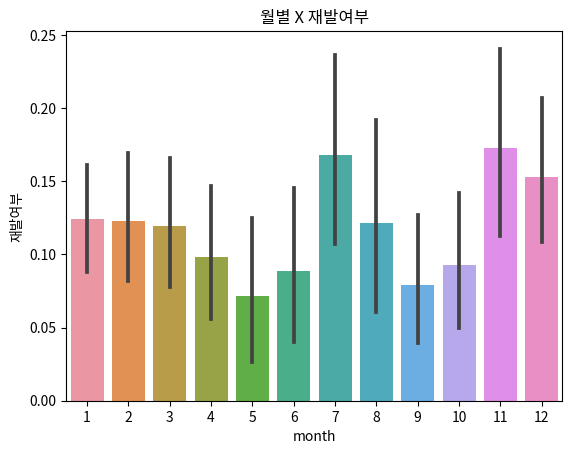

In [6]:
sns.barplot(x='month', y='재발여부', data=new_df)
plt.title("월별 X 재발여부");

In [7]:
chi, pval, dof, expected = stats.chi2_contingency(pivot_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  15.962
p :  0.143


In [8]:
def season(var):
    var = str(var)
    if var[5:7] in ['03','04','05']:
        return '봄'
    elif var[5:7] in ['06','07','08']:
        return '여름'
    elif var[5:7] in ['09','10','11']:
        return '가을'
    else:
        return '겨울'

In [9]:
df['season'] = df['입원일자'].apply(lambda x: season(x))

In [10]:
df.season

0        봄
1        봄
2        봄
3       겨울
4        봄
        ..
1889    겨울
1890    겨울
1891    겨울
1892    겨울
1893    겨울
Name: season, Length: 1894, dtype: object

In [11]:
df['count'] = 1
pivot_df = pd.pivot_table(df, index = 'season', columns='재발여부' , values = 'count' , aggfunc= 'sum')

In [12]:
chi, pval, dof, expected = stats.chi2_contingency(pivot_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  2.952
p :  0.399


In [13]:
def new_season(x):
    if x in ['여름', '가을']:
        result = 1
    else:
        result = 2
    return(result)

In [14]:
df['new_season'] = df['입원일자'].apply(lambda x: new_season(x))

In [15]:
df['count'] = 1
pivot_df = pd.pivot_table(df, index = 'new_season', columns='재발여부' , values = 'count' , aggfunc= 'sum')

In [16]:
chi, pval, dof, expected = stats.chi2_contingency(pivot_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  0.000
p :  1.000


In [17]:
def neww_season(x):
    if x in ['여름', '겨울']:
        result = 1
    else:
        result = 2
    return(result)

In [18]:
df['neww_season'] = df['입원일자'].apply(lambda x: neww_season(x))

In [19]:
df['count'] = 1
pivot_df = pd.pivot_table(df, index = 'neww_season', columns='재발여부' , values = 'count' , aggfunc= 'sum')

In [20]:
chi, pval, dof, expected = stats.chi2_contingency(pivot_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  0.000
p :  1.000


### 당뇨여부 - 재발여부
$H_0 :$ 당뇨 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 당뇨 여부에 따라 재발여부에 차이가 있다.

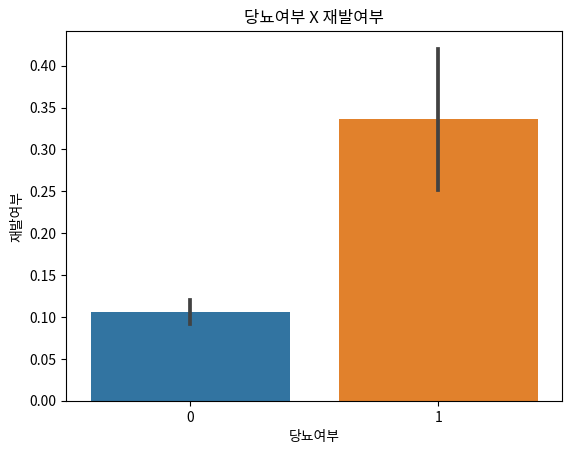

In [21]:
sns.barplot(x='당뇨여부', y='재발여부', data=df)
plt.title("당뇨여부 X 재발여부");

In [22]:
df['count'] = 1
new_df = df.pivot_table(index = '당뇨여부', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,1588,187
1,79,40


In [23]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  54.141
p :  0.000


- 수술 전 당뇨 환자를 위한 care 활동이 필요하다.

###  간질성폐질환 - 재발여부
$H_0 :$ 간질성폐질환에 따라 재발여부에 차이가 없다. \
$H_1 :$ 간질성폐질환에 따라 재발여부에 차이가 있다.

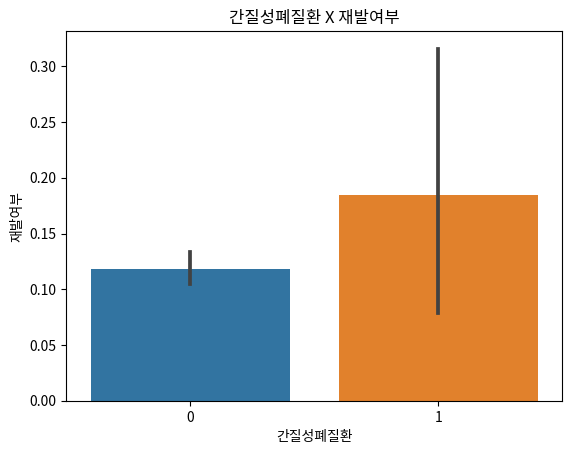

In [24]:
sns.barplot(x='간질성폐질환', y='재발여부', data=df)
plt.title("간질성폐질환 X 재발여부");

In [25]:
df['count'] = 1
new_df = df.pivot_table(index = '간질성폐질환', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,1636,220
1,31,7


In [26]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  0.964
p :  0.326


### 암발병여부 - 재발여부
$H_0 :$ 암발병 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 암발병 여부에 따라 재발여부에 차이가 있다.

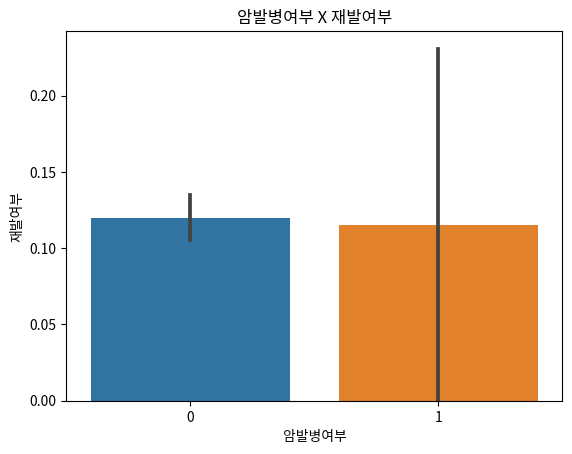

In [27]:
sns.barplot(x='암발병여부', y='재발여부', data=df)
plt.title("암발병여부 X 재발여부");

In [28]:
df[['암발병여부']].value_counts()

암발병여부
0        1868
1          26
dtype: int64

In [29]:
df['count'] = 1
new_df = df.pivot_table(index = '암발병여부', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,1644,224
1,23,3


In [30]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  0.000
p :  1.000


- 암환자 여부에 따른 재발여부는 무의미
- 암환자 표본이 너무 적다 -> 데이터 불균형 
-> 안하면 됨 !

### 심혈관질환 - 재발여부
$H_0 :$ 심혈관질환 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 심혈관질환 여부에 따라 재발여부에 차이가 있다.

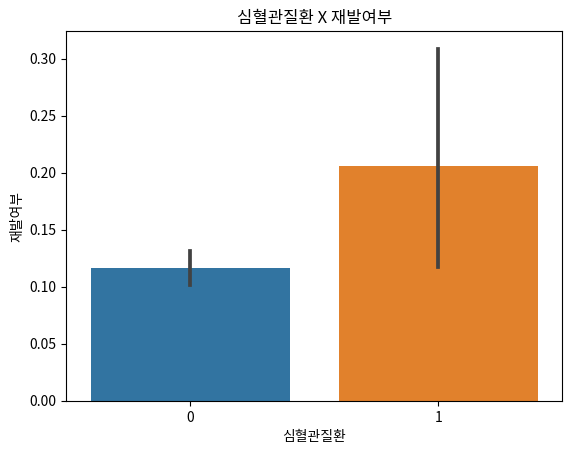

In [31]:
sns.barplot(x='심혈관질환', y='재발여부', data=df)
plt.title("심혈관질환 X 재발여부");

In [32]:
df['count'] = 1
new_df = df.pivot_table(index = '심혈관질환', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,1613,213
1,54,14


In [33]:
df[['심혈관질환']].value_counts()

심혈관질환
0        1826
1          68
dtype: int64

In [34]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  4.139
p :  0.042


- 암환자 표본이 너무 적다 -> 데이터 불균형 
-> 안하면 됨 !

### 신부전여부 - 재발여부
$H_0 :$ 신부전 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 신부전 여부에 따라 재발여부에 차이가 있다.

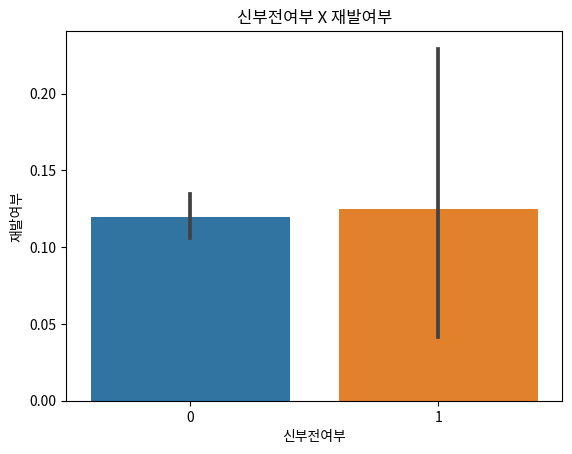

In [35]:
sns.barplot(x='신부전여부', y='재발여부', data=df)
plt.title("신부전여부 X 재발여부");

In [36]:
df[['신부전여부']].value_counts()

신부전여부
0        1846
1          48
dtype: int64

### 스테로이드치료 - 재발여부
$H_0 :$ 스테로이드치료 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 스테로이드치료 여부에 따라 재발여부에 차이가 있다.

In [37]:
df[['스테로이드치료']].value_counts()

스테로이드치료
1          1134
0           760
dtype: int64

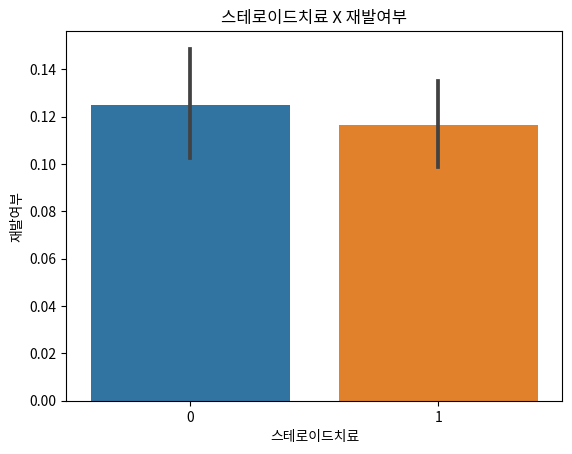

In [38]:
sns.barplot(x='스테로이드치료', y='재발여부', data=df)
plt.title("스테로이드치료 X 재발여부");

In [39]:
df['count'] = 1
new_df = df.pivot_table(index = '스테로이드치료', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,665,95
1,1002,132


In [40]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  0.243
p :  0.622


- 무의미하다 ! 스테로이드치료와 재발여부는 상관없다

### 흡연여부 - 재발여부
$H_0 :$ 흡연 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 흡연 여부에 따라 재발여부에 차이가 있다.

In [41]:
df[['흡연여부']].value_counts()

흡연여부
0       1483
1        411
dtype: int64

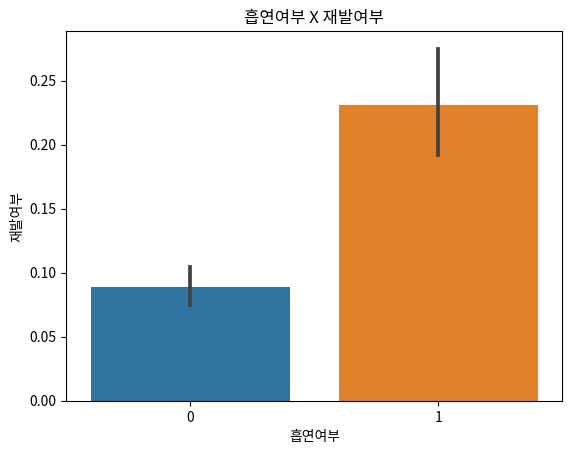

In [42]:
sns.barplot(x='흡연여부', y='재발여부', data=df)
plt.title("흡연여부 X 재발여부");

In [43]:
df['count'] = 1
new_df = df.pivot_table(index = '흡연여부', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,1351,132
1,316,95


In [44]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  60.291
p :  0.000


### 혈전합병증여부 - 재발여부
$H_0 :$ 혈전합병증 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 혈전합병증 여부에 따라 재발여부에 차이가 있다.

In [45]:
df[['혈전합병증여부']].value_counts()

혈전합병증여부
0          1890
1             4
dtype: int64

### 척추전방위증 - 재발여부
$H_0 :$ 척추전방위증 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 척추전방위증 여부에 따라 재발여부에 차이가 있다.

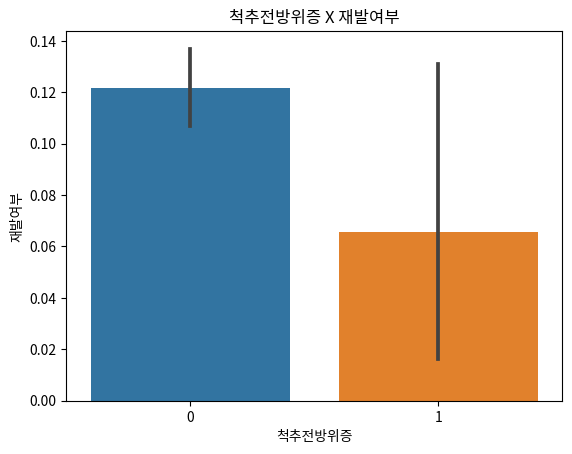

In [46]:
sns.barplot(x='척추전방위증', y='재발여부', data=df)
plt.title("척추전방위증 X 재발여부");

In [47]:
df[['척추전방위증']].value_counts()

척추전방위증
0         1833
1           61
dtype: int64

### 척추이동척도 - 재발여부
$H_0 :$ 척추이동척도 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 척추이동척도 여부에 따라 재발여부에 차이가 있다. 

In [48]:
df[['척추이동척도']].value_counts()

척추이동척도        
Middle            1260
Down               513
Up                  65
Extremely down      40
Extremely up        16
dtype: int64

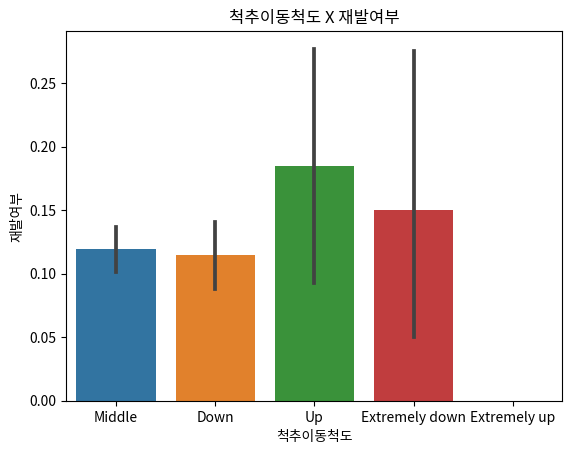

In [49]:
sns.barplot(x='척추이동척도', y='재발여부', data=df)
plt.title("척추이동척도 X 재발여부");

In [50]:
df['count'] = 1
new_df = df.pivot_table(index = '척추이동척도', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,454.0,59.0
1,34.0,6.0
2,16.0,NaN
3,1110.0,150.0
4,53.0,12.0


In [51]:
new_df.fillna(0, inplace = True)

In [52]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  5.230
p :  0.265


### 디스크위치 - 재발여부
$H_0 :$ 디스크위치 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 디스크위치 여부에 따라 재발여부에 차이가 있다.

In [53]:
df[['디스크위치']].value_counts()

디스크위치
4        1458
5         271
3         112
2          27
45          9
34          8
10          2
11          2
1           1
12          1
23          1
25          1
35          1
dtype: int64

In [54]:
df = df[df['디스크위치'] < 7]

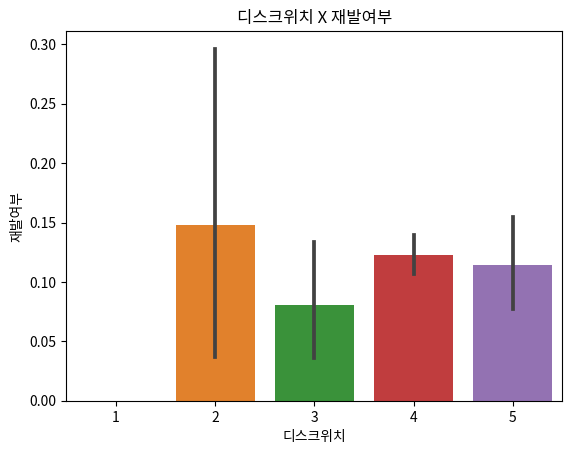

In [55]:
sns.barplot(x='디스크위치', y='재발여부', data=df)
plt.title("디스크위치 X 재발여부");

In [56]:
df['count'] = 1
new_df = df.pivot_table(index = '디스크위치', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,1.0,NaN
1,23.0,4.0
2,103.0,9.0
3,1279.0,179.0
4,240.0,31.0


In [57]:
new_df.fillna(0, inplace = True)

In [58]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  2.195
p :  0.700


### Vaccum disc - 재발여부
$H_0 :$ 진공디스크 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 진공디스크 여부에 따라 재발여부에 차이가 있다.

In [59]:
df[['Vaccum disc']].value_counts()

Vaccum disc
0              1764
1               105
dtype: int64

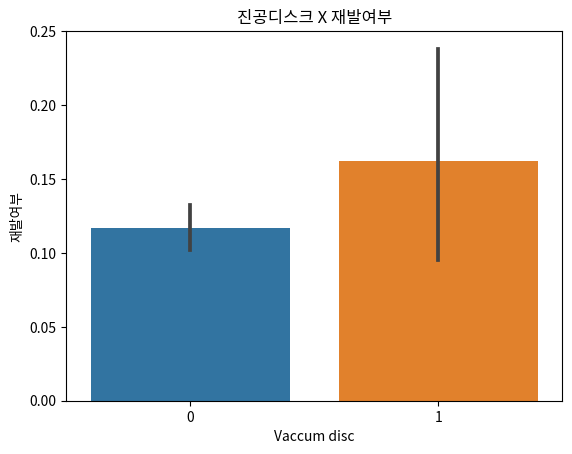

In [60]:
sns.barplot(x='Vaccum disc', y='재발여부', data=df)
plt.title("진공디스크 X 재발여부");

In [61]:
df['count'] = 1
new_df = df.pivot_table(index = 'Vaccum disc', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,1558,206
1,88,17


In [62]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  1.515
p :  0.218


### Modic Change - 재발여부
$H_0 :$ Modic Change 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ Modic Change 여부에 따라 재발여부에 차이가 있다.

In [63]:
df[['Modic change']].value_counts()

Modic change
0               1618
2                172
1                 57
3                 22
dtype: int64

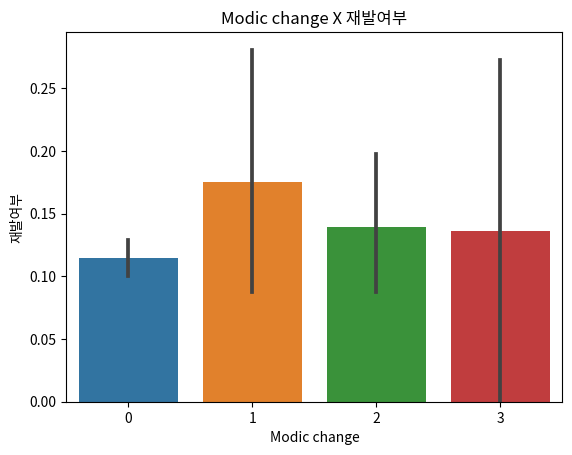

In [64]:
sns.barplot(x='Modic change', y='재발여부', data=df)
plt.title("Modic change X 재발여부");

In [65]:
df['count'] = 1
new_df = df.pivot_table(index = 'Modic change', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,1432,186
1,47,10
2,148,24
3,19,3


In [66]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  2.731
p :  0.435


###  연령 - 재발여부
$H_0 :$ 연령에 따라 재발여부에 차이가 없다. \
$H_1 :$ 연령에 따라 재발여부에 차이가 있다.

In [67]:
def age(x):
    if x <= 18:
        result = "청소년"
    elif x <= 29:
        result = "청년"
    elif x<= 49:
        result = "중년"
    elif x<= 64:
        result = "장년"
    else:
        result = "노년"
    return result


In [68]:
df['new_연령'] = df["연령"].apply(lambda x: age(x))

In [69]:
df[['new_연령']].value_counts()

new_연령
중년        1042
장년         355
청년         343
노년          92
청소년         37
dtype: int64

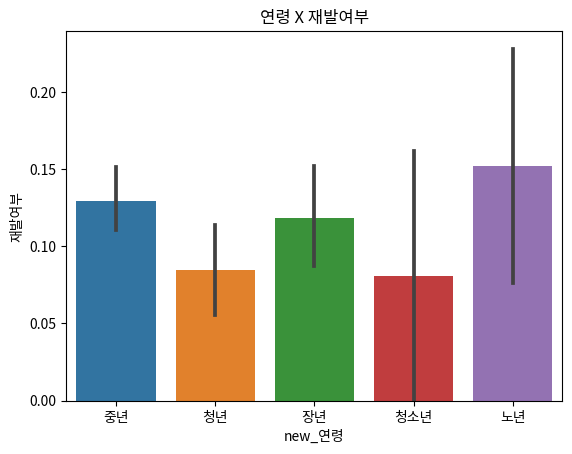

In [70]:
sns.barplot(x='new_연령', y='재발여부', data=df)
plt.title("연령 X 재발여부");

In [71]:
df['count'] = 1
new_df = df.pivot_table(index = 'new_연령', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,78,14
1,313,42
2,907,135
3,314,29
4,34,3


In [72]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  6.450
p :  0.168


###  Instability - 재발여부
$H_0 :$ 척추 불안정 여부에 따라 재발여부에 차이가 없다. \
$H_1 :$ 척추 불안정 여부에 따라 재발여부에 차이가 있다.

In [73]:
df[['Instability']].value_counts()

Instability
0              1792
1                77
dtype: int64

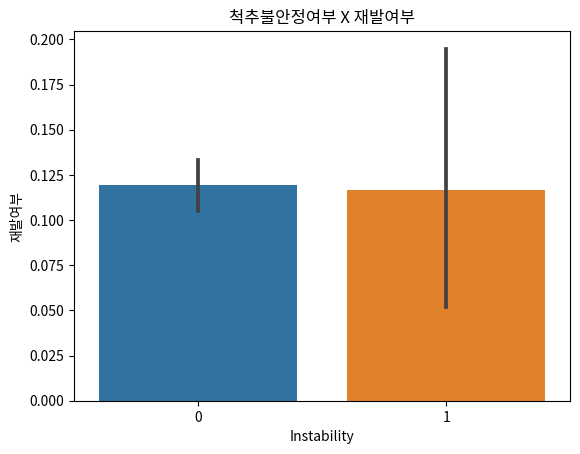

In [74]:
sns.barplot(x='Instability', y='재발여부', data=df)
plt.title("척추불안정여부 X 재발여부");

In [75]:
df['count'] = 1
new_df = df.pivot_table(index = 'Instability', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True)
new_df.head()

재발여부,0,1
0,1578,214
1,68,9


In [76]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

chi-sqauare test
chisq :  0.000
p :  1.000


## 연속형

In [9]:
# 정규성 검정
def  ttest1(df):
    statistic , p = stats.shapiro(df)
    print(f'statistic : {statistic}, p-value = {p}')


In [10]:
# 등분산성 검정
def ttest2(df1, df2):
    result = stats.bartlett(df1, df2)
    print(result)

In [11]:
# t-test
def ttest(df1, df2, right = True):
    t_result = stats.ttest_ind(df1,df2, equal_var = right)
    t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
    print("2-Sample t-test")
    print("t:{}".format(t))
    print("p:{}".format(p))


In [80]:
# 정규성 검정 불통
def man(df1, df2):
    res = stats.mannwhitneyu(df1, df1)
    print(res)


###  체중 - 재발여부
$H_0 :$ 체중에 따라 재발여부에 차이가 없다. \
$H_1 :$ 체중에 따라 재발여부에 차이가 있다.

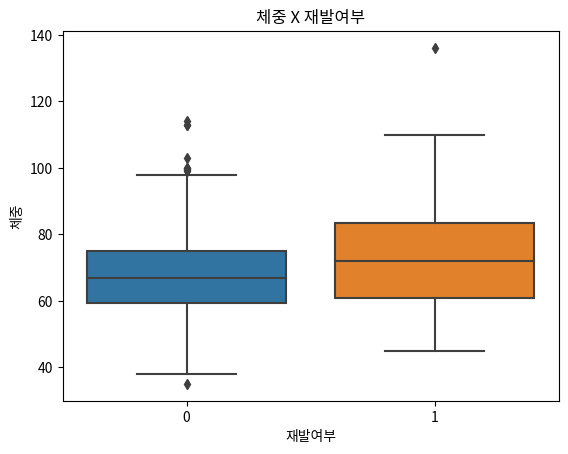

In [81]:
sns.boxplot(x='재발여부', y='체중', data=df)
plt.title("체중 X 재발여부");

In [82]:
df1 = df[df['재발여부'] == 0]['체중']
df2 = df[df['재발여부'] == 1]['체중']

In [83]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=56.80357633281346, pvalue=4.815897579837815e-14)


In [84]:
ttest(df1, df2, False)

2-Sample t-test
t:-6.219
p:0.0


- t가 유의미함

###  신장 - 재발여부
$H_0 :$ 신장에 따라 재발여부에 차이가 없다. \
$H_1 :$ 신장에 따라 재발여부에 차이가 있다.

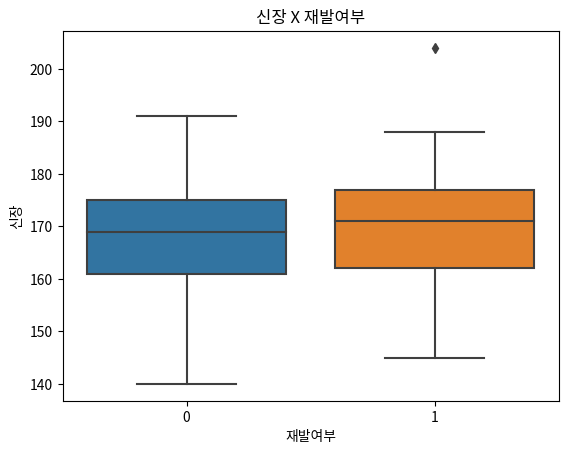

In [85]:
sns.boxplot(x='재발여부', y='신장', data=df)
plt.title("신장 X 재발여부");

In [86]:
df1 = df[df['재발여부'] == 0]['신장']
df2 = df[df['재발여부'] == 1]['신장']

In [87]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=0.9043985699864794, pvalue=0.34160502442901675)


In [88]:
ttest(df1, df2)

2-Sample t-test
t:-2.712
p:0.007


###  과거수술횟수 - 재발여부
$H_0 :$ 과거수술횟수에 따라 재발여부에 차이가 없다. \
$H_1 :$ 과거수술횟수에 따라 재발여부에 차이가 있다.

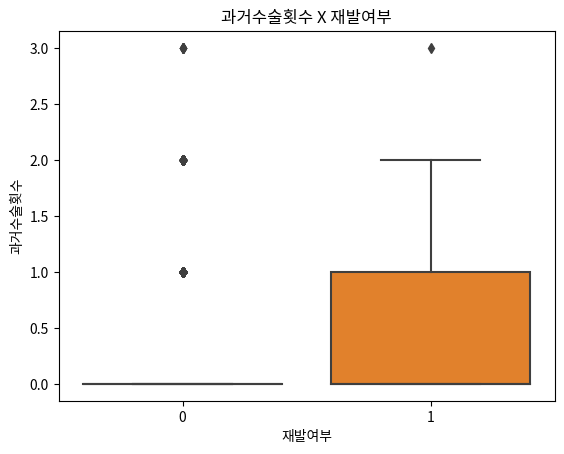

In [89]:
sns.boxplot(x='재발여부', y='과거수술횟수', data=df)
plt.title("과거수술횟수 X 재발여부");

In [90]:
df1 = df[df['재발여부'] == 0]['과거수술횟수']
df2 = df[df['재발여부'] == 1]['과거수술횟수']

In [91]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=4.878324251680115, pvalue=0.02719600979096736)


In [92]:
ttest(df1, df2)

2-Sample t-test
t:-2.042
p:0.041


###  Large Lymphocyte - 재발여부
$H_0 :$ 림프구에 따라 재발여부에 차이가 없다. \
$H_1 :$ 림프구에 따라 재발여부에 차이가 있다.

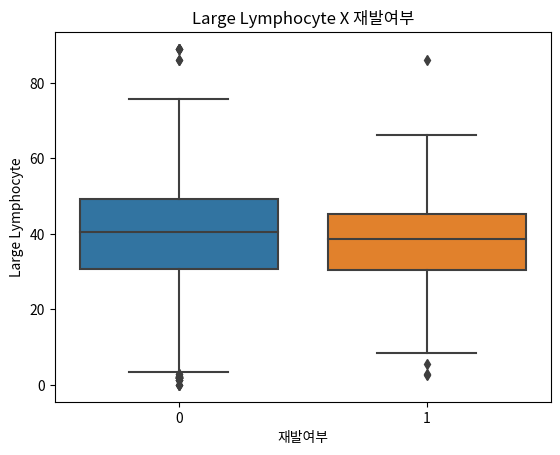

In [93]:
sns.boxplot(x='재발여부', y='Large Lymphocyte', data=df)
plt.title("Large Lymphocyte X 재발여부");

In [94]:
df1 = df[df['재발여부'] == 0]['Large Lymphocyte']
df2 = df[df['재발여부'] == 1]['Large Lymphocyte']

In [95]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=3.9218686843742754, pvalue=0.04766187348608558)


In [96]:
ttest(df1, df2, False)

2-Sample t-test
t:1.822
p:0.069


###  입원기간 - 재발여부
$H_0 :$ 입원기간에 따라 재발여부에 차이가 없다. \
$H_1 :$ 입원기간에 따라 재발여부에 차이가 있다.

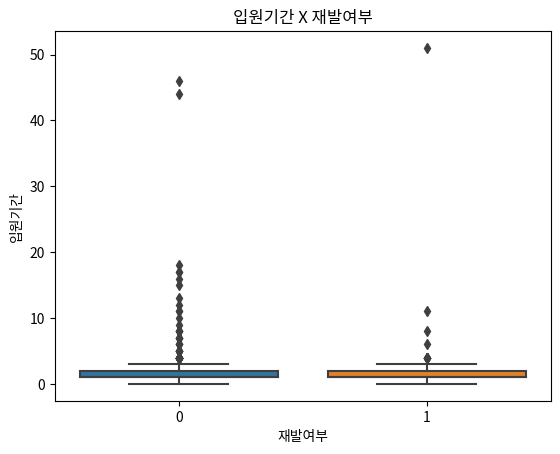

In [97]:
sns.boxplot(x='재발여부', y='입원기간', data=df)
plt.title("입원기간 X 재발여부");

In [98]:
df1 = df[df['재발여부'] == 0]['입원기간']
df2 = df[df['재발여부'] == 1]['입원기간']

In [99]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=149.81000765324987, pvalue=1.9076017279273337e-34)


In [100]:
ttest(df1, df2, False)

2-Sample t-test
t:-0.361
p:0.718


###  입원일자 - 재발여부
$H_0 :$ 입원일자에 따라 재발여부에 차이가 없다. \
$H_1 :$ 입원일자에 따라 재발여부에 차이가 있다.

In [101]:
df['입원일자'] = pd.to_datetime(df['입원일자'])

df1 = df[df['재발여부'] == 0]['입원일자']
df2 = df[df['재발여부'] == 1]['입원일자']

df1_month = pd.to_datetime(df1).dt.month
df2_month = pd.to_datetime(df2).dt.month

result = bartlett(df1_month, df2_month)

print('등분산성 검사 결과:')
print(result)

등분산성 검사 결과:
BartlettResult(statistic=1.154067809925672, pvalue=0.28269923073787473)


In [102]:
ttest(df1_month, df2_month)

2-Sample t-test
t:-0.695
p:0.487


###  퇴원일자 - 재발여부
$H_0 :$ 퇴원일자에 따라 재발여부에 차이가 없다. \
$H_1 :$ 퇴원일자에 따라 재발여부에 차이가 있다.

In [103]:
df['퇴원일자'] = pd.to_datetime(df['퇴원일자'])

df1 = df[df['재발여부'] == 0]['퇴원일자']
df2 = df[df['재발여부'] == 1]['퇴원일자']

df1_month = pd.to_datetime(df1).dt.month
df2_month = pd.to_datetime(df2).dt.month

result = bartlett(df1_month, df2_month)

print('등분산성 검사 결과:')
print(result)

등분산성 검사 결과:
BartlettResult(statistic=0.47363207424470904, pvalue=0.4913209728800261)


In [104]:
ttest(df1_month, df2_month)

2-Sample t-test
t:0.56
p:0.575


###  헤모글로빈수치 - 재발여부
$H_0 :$ 헤모글로빈수치에 따라 재발여부에 차이가 없다. \
$H_1 :$ 헤모글로빈수치에 따라 재발여부에 차이가 있다.

In [105]:
헤모글로빈수치_1 = df[df['성별'] == 1]['헤모글로빈수치'].mean()
헤모글로빈수치_2 = df[df['성별'] == 2]['헤모글로빈수치'].mean()
print(헤모글로빈수치_1)
print(헤모글로빈수치_2)

14.999792027729638
13.929859943977592


In [106]:
df.헤모글로빈수치.fillna(14.976942003514937, inplace=True)

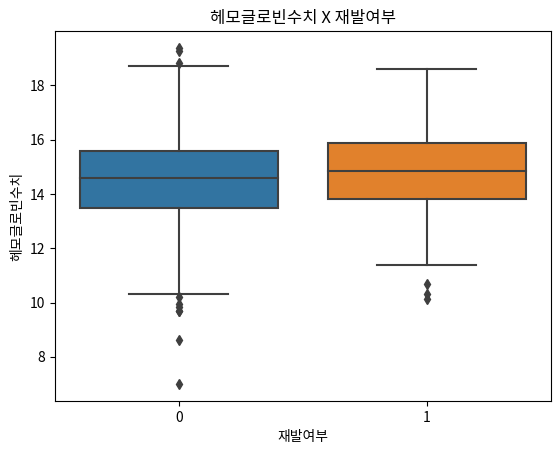

In [107]:
sns.boxplot(x='재발여부', y='헤모글로빈수치', data=df)
plt.title("헤모글로빈수치 X 재발여부");

In [108]:
df1 = df[df['재발여부'] == 0]['헤모글로빈수치']
df2 = df[df['재발여부'] == 1]['헤모글로빈수치']

In [109]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=0.6793078932306335, pvalue=0.40982515048952783)


In [110]:
ttest(df1, df2)

2-Sample t-test
t:-1.967
p:0.049


###  통증기간 - 재발여부
$H_0 :$ 통증기간에 따라 재발여부에 차이가 없다. \
$H_1 :$ 통증기간에 따라 재발여부에 차이가 있다.

In [111]:
df['통증기간(월)'].fillna(df['통증기간(월)'].mean(skipna= True), inplace = True)
#결측치 평균으로 채움

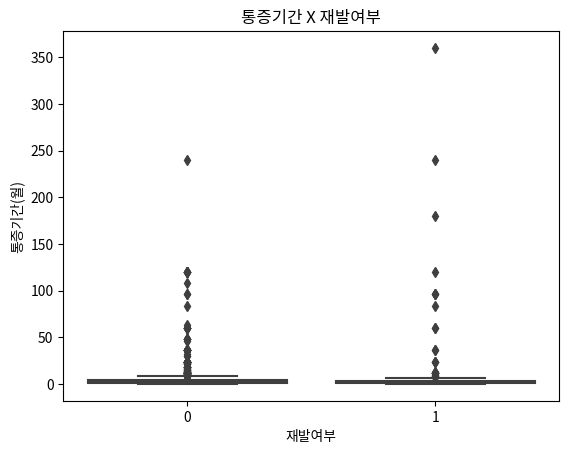

In [112]:
sns.boxplot(x='재발여부', y='통증기간(월)', data=df)
plt.title("통증기간 X 재발여부");

In [113]:
df1 = df[df['재발여부'] == 0]['통증기간(월)']
df2 = df[df['재발여부'] == 1]['통증기간(월)']

In [114]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=574.5027708504006, pvalue=5.886399067014631e-127)


In [115]:
ttest(df1, df2, False)

2-Sample t-test
t:-1.655
p:0.099


###  수술시간 - 재발여부
$H_0 :$ 수술시간에 따라 재발여부에 차이가 없다. \
$H_1 :$ 수술시간에 따라 재발여부에 차이가 있다.

In [116]:
df['수술시간'].fillna(df['수술시간'].mean(skipna= True), inplace = True)

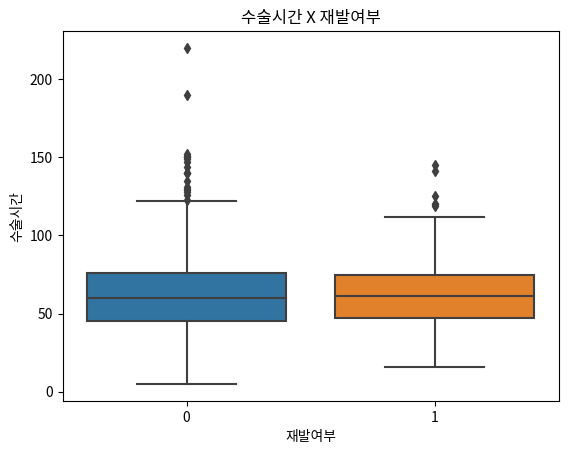

In [117]:
sns.boxplot(x='재발여부', y='수술시간', data=df)
plt.title("수술시간 X 재발여부");

In [118]:
df1 = df[df['재발여부'] == 0]['수술시간']
df2 = df[df['재발여부'] == 1]['수술시간']

In [119]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=2.7012637636576007, pvalue=0.10026873889118258)


In [120]:
ttest(df1, df2)

2-Sample t-test
t:-1.006
p:0.315


###  수술일자 - 재발여부
$H_0 :$ 수술일자에 따라 재발여부에 차이가 없다. \
$H_1 :$ 수술일자에 따라 재발여부에 차이가 있다.

In [121]:
df['수술일자'] = pd.to_datetime(df['수술일자'])

df1 = df[df['재발여부'] == 0]['수술일자']
df2 = df[df['재발여부'] == 1]['수술일자']

df1_month = pd.to_datetime(df1).dt.month
df2_month = pd.to_datetime(df2).dt.month

result = bartlett(df1_month, df2_month)

print('등분산성 검사 결과:')
print(result)

등분산성 검사 결과:
BartlettResult(statistic=0.9725116928029062, pvalue=0.3240545678429808)


In [122]:
ttest(df1_month, df2_month)

2-Sample t-test
t:-0.49
p:0.625


###  전방디스크높이(mm) - 재발여부
$H_0 :$ 전방디스크높이에 따라 재발여부에 차이가 없다. \
$H_1 :$ 전방디스크높이에 따라 재발여부에 차이가 있다.

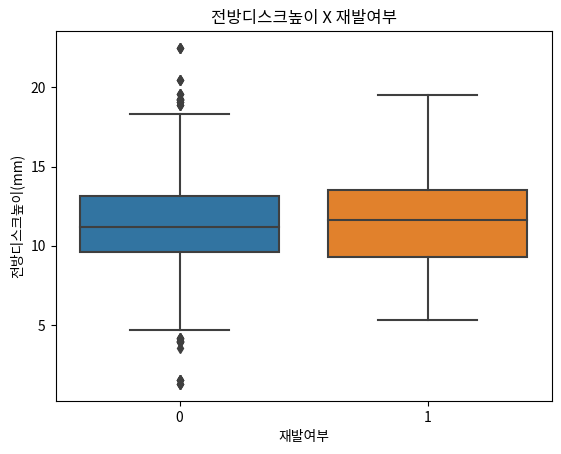

In [123]:
sns.boxplot(x='재발여부', y='전방디스크높이(mm)', data=df)
plt.title("전방디스크높이 X 재발여부");

In [124]:
df1 = df[df['재발여부'] == 0]['전방디스크높이(mm)']
df2 = df[df['재발여부'] == 1]['전방디스크높이(mm)']

In [125]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=0.0682208838418703, pvalue=0.7939450036775098)


In [126]:
ttest(df1, df2)

2-Sample t-test
t:-0.126
p:0.899


###  후방디스크높이(mm) - 재발여부
$H_0 :$ 후방디스크높이에 따라 재발여부에 차이가 없다. \
$H_1 :$ 후방디스크높이에 따라 재발여부에 차이가 있다.

In [127]:
df = df[df['후방디스크높이(mm)'] < 100]

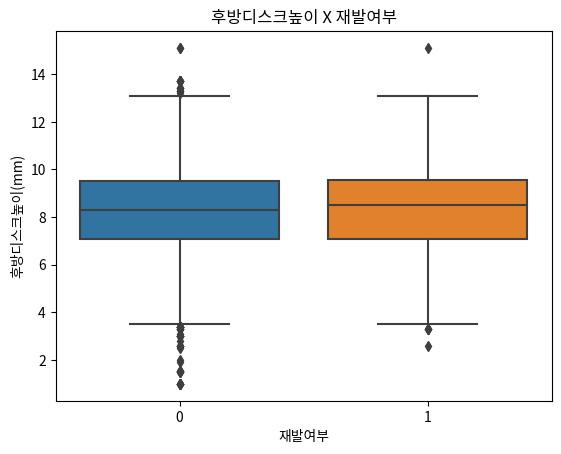

In [128]:
sns.boxplot(x='재발여부', y='후방디스크높이(mm)', data=df)
plt.title("후방디스크높이 X 재발여부");

In [129]:
df1 = df[df['재발여부'] == 0]['후방디스크높이(mm)']
df2 = df[df['재발여부'] == 1]['후방디스크높이(mm)']

In [130]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=0.4710614031683782, pvalue=0.4924992783228659)


In [131]:
ttest(df1, df2)

2-Sample t-test
t:0.465
p:0.642


###  지방축적도 - 재발여부
$H_0 :$ 지방축적도에 따라 재발여부에 차이가 없다. \
$H_1 :$ 지방축적도에 따라 재발여부에 차이가 있다.

In [132]:
df['지방축적도'].isnull().sum()

2

In [133]:
df.dropna(subset=['지방축적도'],inplace = True)

In [134]:
df = df[df['지방축적도'] < 12000]

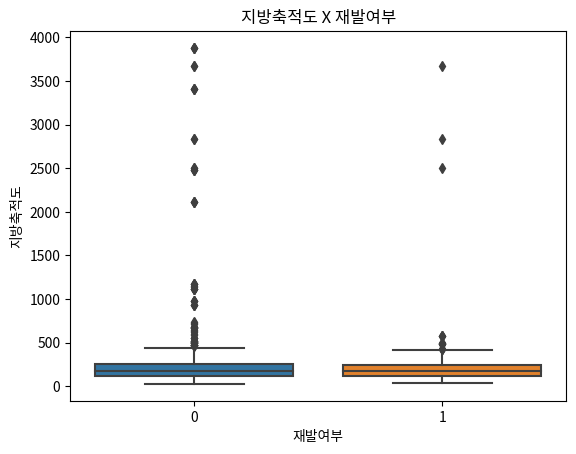

In [135]:
sns.boxplot(x='재발여부', y='지방축적도', data=df)
plt.title("지방축적도 X 재발여부");

In [136]:
df1 = df[df['재발여부'] == 0]['지방축적도']
df2 = df[df['재발여부'] == 1]['지방축적도']

In [137]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=1.742916047816216, pvalue=0.1867697679822536)


In [138]:
ttest(df1, df2)

2-Sample t-test
t:-0.104
p:0.917


###  MF+ES - 재발여부
$H_0 :$ 척추 기립근 및 다열근 근육량에 따라 재발여부에 차이가 없다. \
$H_1 :$ 척추 기립근 및 다열근 근육량에 따라 재발여부에 차이가 있다.

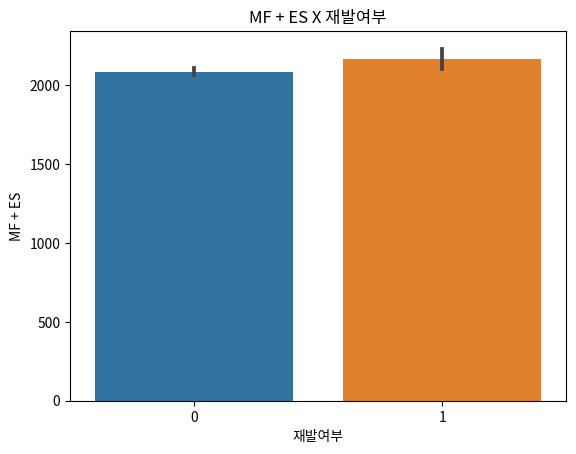

In [139]:
sns.barplot(x='재발여부', y='MF + ES', data=df)
plt.title("MF + ES X 재발여부");

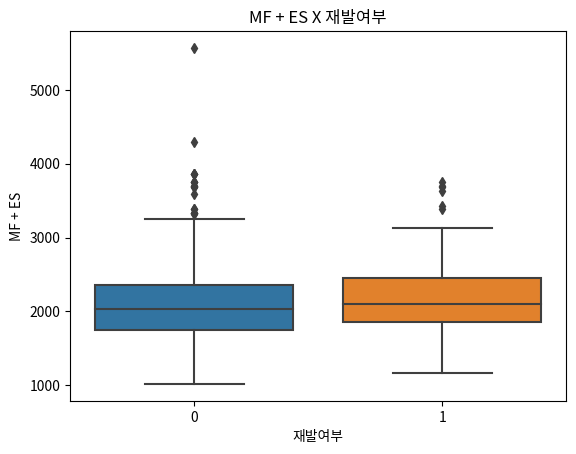

In [140]:
sns.boxplot(x='재발여부', y='MF + ES', data=df)
plt.title("MF + ES X 재발여부");

In [141]:
df1 = df[df['재발여부'] == 0]['MF + ES']
df2 = df[df['재발여부'] == 1]['MF + ES']

In [142]:
print('등분산성 : ')
ttest2(df1, df2)

등분산성 : 
BartlettResult(statistic=0.08854260977025417, pvalue=0.7660381660326863)


In [143]:
ttest(df1, df2)

2-Sample t-test
t:-2.422
p:0.016


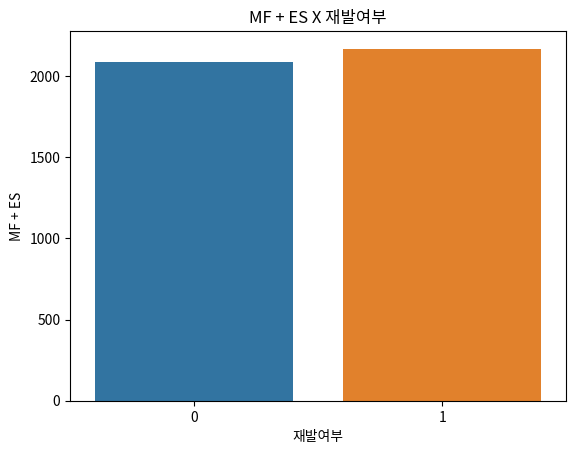

In [144]:
sns.barplot(x='재발여부', y='MF + ES', data=df, errorbar = ("ci" , False))
plt.title("MF + ES X 재발여부");

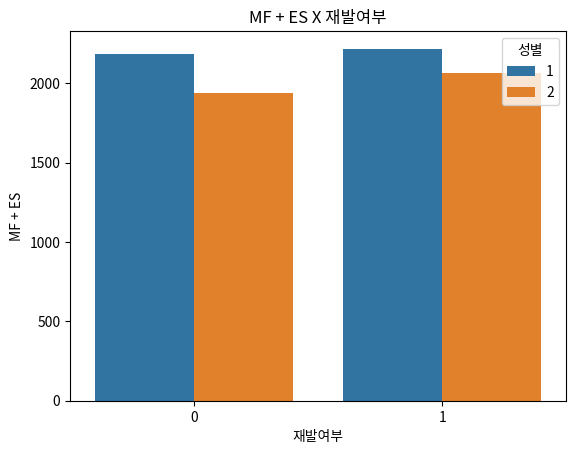

In [145]:
sns.barplot(x='재발여부', y='MF + ES', data=df, errorbar = ("ci" , False), hue = "성별")
plt.title("MF + ES X 재발여부");

# 8/16 !!!!!!!!!!!!!!!!!!!!!!!!

In [146]:
def ttest(df1, df2, rihgt = True):
    t_result = stats.ttest_ind(df1,df2, equal_var = rihgt)
    t,p = t_result.statistic, t_result.pvalue
    print("2-Sample t-test")
    print("t:{}".format(t))
    print("p:{}".format(p))

In [147]:
def chi2(df):
    chi, pval, dof, expected = stats.chi2_contingency(df)
    
    print('chi-sqauare test')
    print(f'chisq : {chi}')
    print(f'p : {pval}')

In [148]:
df['직업'].value_counts()

사무직      441
자영업      170
무직       161
학생       129
주부       112
군인        89
공무원       50
운수업       49
노동직       42
의료직       40
농업        39
사업가       37
교사        29
특수전문직     23
건설업       17
운동선수      14
예술가       10
Name: 직업, dtype: int64

In [149]:
df['MF + ES'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1863 entries, 0 to 1893
Series name: MF + ES
Non-Null Count  Dtype  
--------------  -----  
1863 non-null   float64
dtypes: float64(1)
memory usage: 29.1 KB


In [150]:
def detect_outliers(df, columns):
    
    q1 = df[df[columns]!=0][columns].quantile(0.25)
    q3 = df[df[columns]!=0][columns].quantile(0.75)
    
#     print(q1, q3)
    iqr = q3 - q1
#     print(iqr)
    boundary = 1.5*iqr
    index1 = df[df[columns] > (q3 + boundary)].index
#     print(q3 + boundary)
    index2 = df[(df[columns] < (q1 - boundary)) & (df[columns] == 0)].index
#     print(q1 - boundary)
#     print(index1)
#     print(index2)
    
    df.drop(index1, inplace = True)
    df.drop(index2, inplace = True)
    return df

In [151]:
df = detect_outliers(df, "MF + ES")


In [152]:
df['MF + ES'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1838 entries, 0 to 1893
Series name: MF + ES
Non-Null Count  Dtype  
--------------  -----  
1838 non-null   float64
dtypes: float64(1)
memory usage: 28.7 KB


## MF + ES - 직업

In [153]:
df_office = df[df['직업'] == '사무직']

In [154]:

df1 = df_office[df_office['재발여부'] == 1]['MF + ES']
df2 = df_office[df_office['재발여부'] == 0]['MF + ES']


ttest(df1, df2)


2-Sample t-test
t:2.2698142395530274
p:0.023710866733073835


In [155]:
df_athlete = df[df['직업'] == '운동선수']

In [156]:
df1 = df_athlete[df_athlete['재발여부'] == 1]['MF + ES']
df2 = df_athlete[df_athlete['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

2-Sample t-test
t:0.4200517311020123
p:0.6818708928787667


In [ ]:
df_teacher = df[df['직업'] == '교사']
df1 = df_teacher[df_teacher['재발여부'] == 1]['MF + ES']
df2 = df_teacher[df_teacher['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_gong = df[df['직업'] == '공무원']
df1 = df_gong[df_gong['재발여부'] == 1]['MF + ES']
df2 = df_gong[df_gong['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_ja = df[df['직업'] == '자영업']
df1 = df_ja[df_ja['재발여부'] == 1]['MF + ES']
df2 = df_ja[df_ja['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_doc = df[df['직업'] == '의료직']
df1 = df_doc[df_doc['재발여부'] == 1]['MF + ES']
df2 = df_doc[df_doc['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_gunsul = df[df['직업'] == '건설업']
df1 = df_gunsul[df_gunsul['재발여부'] == 1]['MF + ES']
df2 = df_gunsul[df_gunsul['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_saup = df[df['직업'] == '사업가']
df1 = df_saup[df_saup['재발여부'] == 1]['MF + ES']
df2 = df_saup[df_saup['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_nongup = df[df['직업'] == '농업']
df1 = df_nongup[df_nongup['재발여부'] == 1]['MF + ES']
df2 = df_nongup[df_nongup['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_jubu = df[df['직업'] == '주부']
df1 = df_jubu[df_jubu['재발여부'] == 1]['MF + ES']
df2 = df_jubu[df_jubu['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_student = df[df['직업'] == '학생']
df1 = df_student[df_student['재발여부'] == 1]['MF + ES']
df2 = df_student[df_student['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_nodong = df[df['직업'] == '노동직']
df1 = df_nodong[df_nodong['재발여부'] == 1]['MF + ES']
df2 = df_nodong[df_nodong['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_teuksu = df[df['직업'] == '특수전문직']
df1 = df_teuksu[df_teuksu['재발여부'] == 1]['MF + ES']
df2 = df_teuksu[df_teuksu['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_soldier = df[df['직업'] == '군인']
df1 = df_soldier[df_soldier['재발여부'] == 1]['MF + ES']
df2 = df_soldier[df_soldier['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_unsu = df[df['직업'] == '운수업']
df1 = df_unsu[df_unsu['재발여부'] == 1]['MF + ES']
df2 = df_unsu[df_unsu['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df['직업'].fillna("기타", inplace = True)

In [ ]:
df_etc = df[df['직업'] == '기타']
df1 = df_etc[df_etc['재발여부'] == 1]['MF + ES']
df2 = df_etc[df_etc['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
df_artist = df[df['직업'] == '예술가']
df1 = df_artist[df_artist['재발여부'] == 1]['MF + ES']
df2 = df_artist[df_artist['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
sns.boxplot(x='재발여부', y='MF + ES', data=df_office)
plt.title("MF + ES X 사무직 X 재발여부");

## MF+ES - 통증정도

In [4]:
df1 = df[df['환자통증정도'] == 1]['MF + ES']
df2 = df[df['환자통증정도'] == 2]['MF + ES']
df3 = df[df['환자통증정도'] == 3]['MF + ES']
df4 = df[df['환자통증정도'] == 4]['MF + ES']
df5 = df[df['환자통증정도'] == 5]['MF + ES']
df6 = df[df['환자통증정도'] == 6]['MF + ES']
df7 = df[df['환자통증정도'] == 7]['MF + ES']
df8 = df[df['환자통증정도'] == 8]['MF + ES']
df9 = df[df['환자통증정도'] == 9]['MF + ES']
df10 = df[df['환자통증정도'] == 10]['MF + ES']

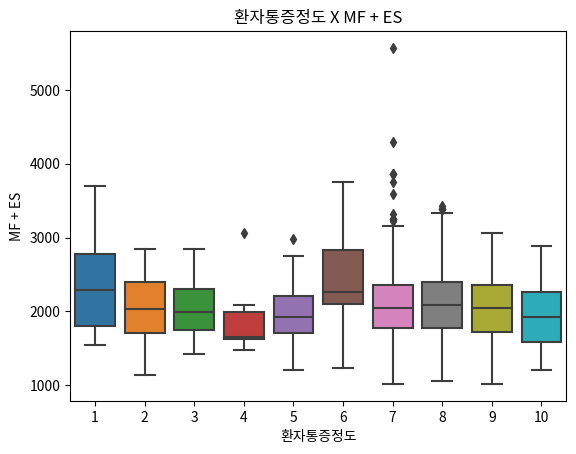

In [5]:
sns.boxplot(x='환자통증정도', y='MF + ES', data=df)
plt.title("환자통증정도 X MF + ES");

In [12]:
f_result = stats.f_oneway(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10)

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way ANOVA")
print(" F 통계량: {}".format(f))
print(" p-value: {}".format(p))

One-way ANOVA
 F 통계량: 6.736
 p-value: 0.0


In [13]:
f_result = stats.f_oneway(df1, df10)

f,p = f_result.statistic, f_result.pvalue

print("One-way ANOVA")
print(" F 통계량: {}".format(f))
print(" p-value: {}".format(p))

One-way ANOVA
 F 통계량: 25.98037144497072
 p-value: 9.803031519721798e-07


In [14]:
ttest(df1, df10)

2-Sample t-test
t:5.097
p:0.0


In [ ]:
df_office = df[df['직업'] == '사무직']

In [ ]:
df1 = df_office[df_office['환자통증정도'] == 1]['MF + ES']
df2 = df_office[df_office['환자통증정도'] == 2]['MF + ES']
df3 = df_office[df_office['환자통증정도'] == 3]['MF + ES']
df4 = df_office[df_office['환자통증정도'] == 4]['MF + ES']
df5 = df_office[df_office['환자통증정도'] == 5]['MF + ES']
df6 = df_office[df_office['환자통증정도'] == 6]['MF + ES']
df7 = df_office[df_office['환자통증정도'] == 7]['MF + ES']
df8 = df_office[df_office['환자통증정도'] == 8]['MF + ES']
df9 = df_office[df_office['환자통증정도'] == 9]['MF + ES']
df10 = df_office[df_office['환자통증정도'] == 10]['MF + ES']

In [ ]:
sns.boxplot(x='환자통증정도', y='MF + ES', data=df_office)
plt.title("환자통증정도 X MF + ES");

In [ ]:
df4

In [ ]:
f_result = stats.f_oneway(df1, df2, df3, df5, df6, df7, df8, df9, df10)

f,p = f_result.statistic, f_result.pvalue

print("One-way ANOVA")
print(" F 통계량: {}".format(f))
print(" p-value: {}".format(p))

In [ ]:
f_result = stats.f_oneway(df1, df10)

f,p = f_result.statistic, f_result.pvalue

print("One-way ANOVA")
print(" F 통계량: {}".format(f))
print(" p-value: {}".format(p))

### -환자 통증정도 4가 없었음

In [15]:
# 교사
df_teacher = df[df['직업'] == '교사']
df1 = df_teacher[df_teacher['환자통증정도'] == 1]['MF + ES']
df2 = df_teacher[df_teacher['환자통증정도'] == 2]['MF + ES']
df3 = df_teacher[df_teacher['환자통증정도'] == 3]['MF + ES']
df4 = df_teacher[df_teacher['환자통증정도'] == 4]['MF + ES']
df5 = df_teacher[df_teacher['환자통증정도'] == 5]['MF + ES']
df6 = df_teacher[df_teacher['환자통증정도'] == 6]['MF + ES']
df7 = df_teacher[df_teacher['환자통증정도'] == 7]['MF + ES']
df8 = df_teacher[df_teacher['환자통증정도'] == 8]['MF + ES']
df9 = df_teacher[df_teacher['환자통증정도'] == 9]['MF + ES']
df10 = df_teacher[df_teacher['환자통증정도'] == 10]['MF + ES']

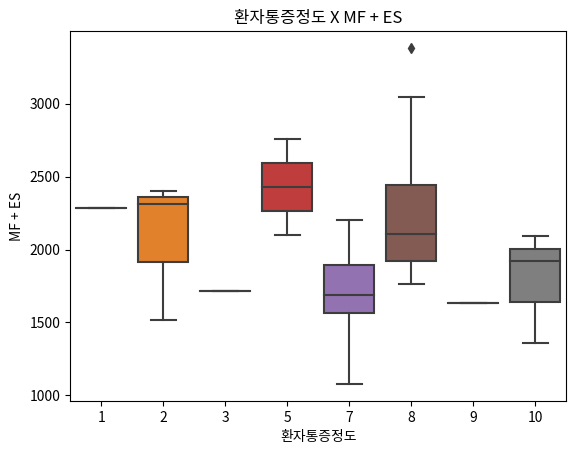

In [16]:
sns.boxplot(x='환자통증정도', y='MF + ES', data=df_teacher)
plt.title("환자통증정도 X MF + ES");

In [17]:
f_result = stats.f_oneway(df5, df7)

f,p = f_result.statistic, f_result.pvalue

print("One-way ANOVA")
print(" F 통계량: {}".format(f))
print(" p-value: {}".format(p))

One-way ANOVA
 F 통계량: 7.332019519366494
 p-value: 0.02037190329498326


In [29]:
df['직업'].value_counts()

사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
의료직       40
농업        40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
Name: 직업, dtype: int64

In [30]:
# 교사
df_doc = df[df['직업'] == '의료직']
df1 = df_doc[df_doc['환자통증정도'] == 1]['MF + ES']
df2 = df_doc[df_doc['환자통증정도'] == 2]['MF + ES']
df3 = df_doc[df_doc['환자통증정도'] == 3]['MF + ES']
df4 = df_doc[df_doc['환자통증정도'] == 4]['MF + ES']
df5 = df_doc[df_doc['환자통증정도'] == 5]['MF + ES']
df6 = df_doc[df_doc['환자통증정도'] == 6]['MF + ES']
df7 = df_doc[df_doc['환자통증정도'] == 7]['MF + ES']
df8 = df_doc[df_doc['환자통증정도'] == 8]['MF + ES']
df9 = df_doc[df_doc['환자통증정도'] == 9]['MF + ES']
df10 = df_doc[df_doc['환자통증정도'] == 10]['MF + ES']

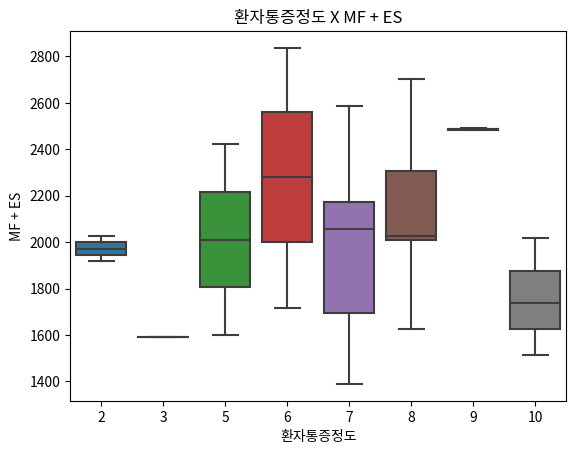

In [31]:
sns.boxplot(x='환자통증정도', y='MF + ES', data=df_doc)
plt.title("환자통증정도 X MF + ES");

In [33]:
f_result = stats.f_oneway(df2, df10)

f,p = f_result.statistic, f_result.pvalue

print("One-way ANOVA")
print(" F 통계량: {}".format(f))
print(" p-value: {}".format(p))

One-way ANOVA
 F 통계량: 1.2682723755703054
 p-value: 0.34204525076833997


In [ ]:
sns.lmplot(data = df, x = '환자통증정도', y = 'MF + ES')

## 직업

In [ ]:
df['직업'].value_counts()

In [ ]:
df = df[df['직업'] != '기타']

In [ ]:
df['직업'].value_counts()

In [ ]:
def twosplit(x):
    if x in ['사무직' , '기타', '무직' ,'학생', '주부', '공무원', '운수업', '의료직', '사업가', '교사','특수전문직', '예술가']:
        result = 0
    else:
        result = 1

    return result

In [ ]:
def threesplit(x):
    if  x in ['사무직', '공무원', '운수업']:
        result = 0
    elif x in ['무직', '학생', '주부', '의료직', '사업가', '교사', '예술가']:
        result = 1
    else:
        result = 3

    return result

In [ ]:
df['new_job_two'] = df['직업'].apply(lambda x : twosplit(x))

In [ ]:
df['new_job_three'] = df['직업'].apply(lambda x : threesplit(x))

In [ ]:
df['count'] = 1
new_df = df.pivot_table(index = '직업', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True).fillna(0)
new_df

In [ ]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

In [ ]:
df.reset_index(inplace= True)

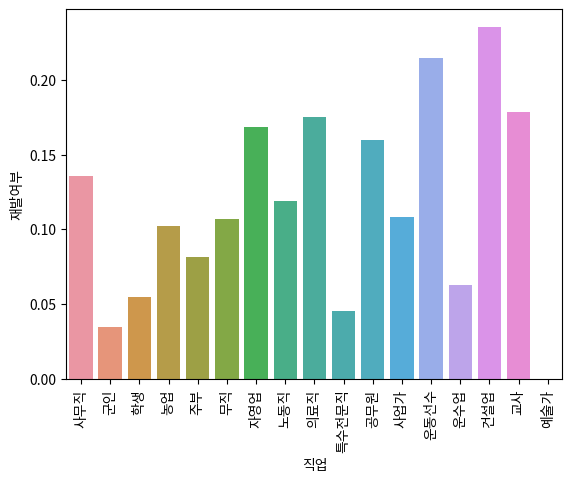

In [161]:
sns.barplot(data = df , x = '직업', y = '재발여부', errorbar = ('ci',False))
plt.xticks(rotation = 90);

In [ ]:
df['count'] = 1
new_job_two = df.pivot_table(index = 'new_job_two', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True).fillna(0)
new_job_two

In [ ]:
chi, pval, dof, expected = stats.chi2_contingency(new_job_two)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

In [ ]:
df['count'] = 1
new_job_three = df.pivot_table(index = 'new_job_three', columns = '재발여부', values = 'count', aggfunc = 'sum').reset_index(drop=True).fillna(0)
new_job_three

In [ ]:
chi, pval, dof, expected = stats.chi2_contingency(new_job_three)
print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

###  PI - 재발여부
$H_0 :$ 척추 휘어짐 정도(종방향)에 따라 재발여부에 차이가 없다. \
$H_1 :$ 척추 휘어짐 정도(종방향)에 따라 재발여부에 차이가 있다.

In [ ]:
df.dropna(subset=['PI'],inplace = True)

In [ ]:
df = df[df['PI'] <= 500]

In [ ]:
sns.boxplot(x='재발여부', y='PI', data=df)
plt.title("PI X 재발여부");

In [ ]:
df1 = df[df['재발여부'] == 0]['PI']
df2 = df[df['재발여부'] == 1]['PI']

In [ ]:
print('등분산성 : ')
ttest2(df1, df2)

In [ ]:
ttest(df1, df2)

###  PT - 재발여부
$H_0 :$ 척추 휘어짐 정도(횡방향)에 따라 재발여부에 차이가 없다. \
$H_1 :$ 척추 휘어짐 정도(횡방향)에 따라 재발여부에 차이가 있다.

In [ ]:
df['PT'].isnull().sum()

In [ ]:
sns.boxplot(x='재발여부', y='PT', data=df)
plt.title("PT X 재발여부");

In [ ]:
df1 = df[df['재발여부'] == 0]['PT']
df2 = df[df['재발여부'] == 1]['PT']

In [ ]:
print('등분산성 : ')
ttest2(df1, df2)

In [ ]:
ttest(df1, df2)

###  SegAngle - 재발여부
$H_0 :$ 척추 각도에 따라 재발여부에 차이가 없다. \
$H_1 :$ 척추 각도에 따라 재발여부에 차이가 있다.

In [ ]:
df['Seg Angle(raw)'].isnull().sum()

In [ ]:
sns.boxplot(x='재발여부', y='Seg Angle(raw)', data=df)
plt.title("척추 각도 X 재발여부");

In [ ]:
df1 = df[df['재발여부'] == 0]['Seg Angle(raw)']
df2 = df[df['재발여부'] == 1]['Seg Angle(raw)']

In [ ]:
print('등분산성 : ')
ttest2(df1, df2)

In [ ]:
ttest(df1, df2, False)

###  골밀도 - 재발여부
$H_0 :$ 골밀도에 따라 재발여부에 차이가 없다. \
$H_1 :$ 골밀도에 따라 재발여부에 차이가 있다.

###  디스크단면적 - 재발여부
$H_0 :$ 디스크단면적에 따라 재발여부에 차이가 없다. \
$H_1 :$ 디스크단면적에 따라 재발여부에 차이가 있다.

In [ ]:
df['디스크단면적'].isnull().sum()

In [ ]:
df.dropna(subset=['디스크단면적'],inplace = True)

In [ ]:
sns.boxplot(x='재발여부', y='디스크단면적', data=df)
plt.title("디스크단면적 X 재발여부");

In [ ]:
df1 = df[df['재발여부'] == 0]['디스크단면적']
df2 = df[df['재발여부'] == 1]['디스크단면적']

In [ ]:
print('등분산성 : ')
ttest2(df1, df2)

In [ ]:
ttest(df1, df2)

In [ ]:
sns.barplot(data = df , x = '재발여부', y = '디스크단면적')
plt.title('디스크단면적 X 재발여부');

In [ ]:
def chi2(df):
    chi, pval, dof, expected = stats.chi2_contingency(df)
    
    print('chi-sqauare test')
    print(f'chisq : {chi}')
    print(f'p : {pval}')

## 당뇨 X 재발여부

In [ ]:
df['당뇨여부'].value_counts()

In [ ]:
sns.barplot(data = df , x = '당뇨여부', y = '재발여부')
plt.title('당뇨여부 X 재발여부');

In [ ]:
new_df = df.pivot_table(index = '당뇨여부', columns='재발여부', values= 'count', aggfunc='sum').reset_index(drop=True)

In [ ]:
chi, pval, dof, expected = stats.chi2_contingency(new_df)

print('chi-sqauare test')
print(f'chisq : {chi : 0.3f}')
print(f'p : {pval : 0.3f}')

In [ ]:
df.columns

In [ ]:
df_true = df[df['당뇨여부'] == 1]

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['Large Lymphocyte']
df2 = df_true[df_true['재발여부'] == 0]['Large Lymphocyte']

ttest(df1, df2)

In [ ]:
df.isnull().sum()

In [ ]:
df['count'] = 1
pivot_df = pd.pivot_table(df_true, index = 'Location of herniation', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
### 가족력
# chi2
pivot_df = pd.pivot_table(df_true, index = '가족력', columns = '재발여부', values = 'count', aggfunc = 'sum')
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '간질성폐질환', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '고혈압여부', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['과거수술횟수']
df2 = df_true[df_true['재발여부'] == 0]['과거수술횟수']

ttest(df1, df2)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '스테로이드치료', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '성별', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['신장']
df2 = df_true[df_true['재발여부'] == 0]['신장']

ttest(df1, df2)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['체중']
df2 = df_true[df_true['재발여부'] == 0]['체중']

ttest(df1, df2)

In [ ]:
df['new_연령']

In [ ]:
pivot_df = pd.pivot_table(df_true, index = 'new_연령', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '우울증여부', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
df['우울증여부'].isnull().sum()

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['입원기간']
df2 = df_true[df_true['재발여부'] == 0]['입원기간']

ttest(df1, df2)

In [ ]:
### 헤모글로빈수치
df1 = df_true[df_true['재발여부'] == 1]['헤모글로빈수치']
df2 = df_true[df_true['재발여부'] == 0]['헤모글로빈수치']

ttest(df1, df2)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '흡연여부', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
### 통증기간
df1 = df_true[df_true['재발여부'] == 1]['통증기간(월)']
df2 = df_true[df_true['재발여부'] == 0]['통증기간(월)']

ttest(df1, df2)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '수술기법', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['수술시간']
df2 = df_true[df_true['재발여부'] == 0]['수술시간']

ttest(df1, df2)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '수술실패여부', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['전방디스크높이(mm)']
df2 = df_true[df_true['재발여부'] == 0]['전방디스크높이(mm)']

ttest(df1, df2)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['후방디스크높이(mm)']
df2 = df_true[df_true['재발여부'] == 0]['후방디스크높이(mm)']

ttest(df1, df2)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['지방축적도']
df2 = df_true[df_true['재발여부'] == 0]['지방축적도']

ttest(df1, df2)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = 'Instability', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
df_true = df_true[df_true['MF + ES'] <= 5000]

In [ ]:
df_true

In [ ]:
sns.barplot(x='재발여부', y='MF + ES', data=df_true, errorbar = ("ci" , False))
plt.title("MF + ES X 재발여부, 당뇨인 경우");

In [ ]:
sns.barplot(x='재발여부', y='MF + ES', data=df[df['당뇨여부'] != 1], errorbar = ("ci" , False))
plt.title("MF + ES X 재발여부, 당뇨가 아닌 경우");

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['MF + ES']
df2 = df_true[df_true['재발여부'] == 0]['MF + ES']

ttest(df1, df2)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = 'Modic change', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['PI']
df2 = df_true[df_true['재발여부'] == 0]['PI']

ttest(df1, df2)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['PT']
df2 = df_true[df_true['재발여부'] == 0]['PT']

ttest(df1, df2)

In [ ]:
sns.barplot(x='재발여부', y='PT', data=df_true, errorbar = ("ci" , False))
plt.title("PT X 재발여부, 당뇨인 경우");

In [ ]:
sns.barplot(x='재발여부', y='PT', data=df[df['당뇨여부'] != 1], errorbar = ("ci" , False))
plt.title("MF + ES X 재발여부, 당뇨가 아닌 경우");

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['Seg Angle(raw)']
df2 = df_true[df_true['재발여부'] == 0]['Seg Angle(raw)']

ttest(df1, df2) 

In [ ]:
pivot_df = pd.pivot_table(df_true, index = 'Vaccum disc', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
df1 = df_true[df_true['재발여부'] == 1]['디스크단면적']
df2 = df_true[df_true['재발여부'] == 0]['디스크단면적']

ttest(df1, df2)

In [ ]:
sns.barplot(x='재발여부', y='디스크단면적', data=df_true, errorbar = ("ci" , False))
plt.title("디스크단면적 X 재발여부, 당뇨인 경우");

In [ ]:
sns.barplot(x='재발여부', y='디스크단면적', data=df[df['당뇨여부'] != 1], errorbar = ("ci" , False))
plt.title("디스크단면적 X 재발여부, 당뇨가 아닌 경우");

In [ ]:
df['중년'] = df['new_연령'] == "중년"
df_true['중년'] = df['new_연령'] == "중년"

In [ ]:
df_중년 = df[df['new_연령'] == "중년"]
df['중년'] = df['new_연령'] == "중년"

In [ ]:
pivot_df = pd.pivot_table(df_중년, index = '당뇨여부', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df_중년, index = '성별', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df, index = '중년', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '중년', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '디스크위치', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '척추이동척도', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)

In [ ]:
pivot_df = pd.pivot_table(df_true, index = '척추전방위증', columns = '재발여부', values = 'count', aggfunc = 'sum').fillna(0)
chi2(pivot_df)